<a href="https://colab.research.google.com/github/rajan314/Sales_Prediction-Supply-chain-Analysis-/blob/main/project43.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

from tensorflow.keras.optimizers import Adam

 Step 1: Generate synthetic sales data for demand forecasting
Simulating monthly sales for a year (12 months)

In [2]:
data = {
    'Month': pd.date_range('2021-01-01', periods=12, freq='M'),
    'Sales': [200, 220, 250, 240, 280, 300, 350, 370, 400, 420, 450, 480]

}
df = pd.DataFrame(data)

/tmp/ipython-input-2-2192894896.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  'Month': pd.date_range('2021-01-01', periods=12, freq='M'),


plot the data

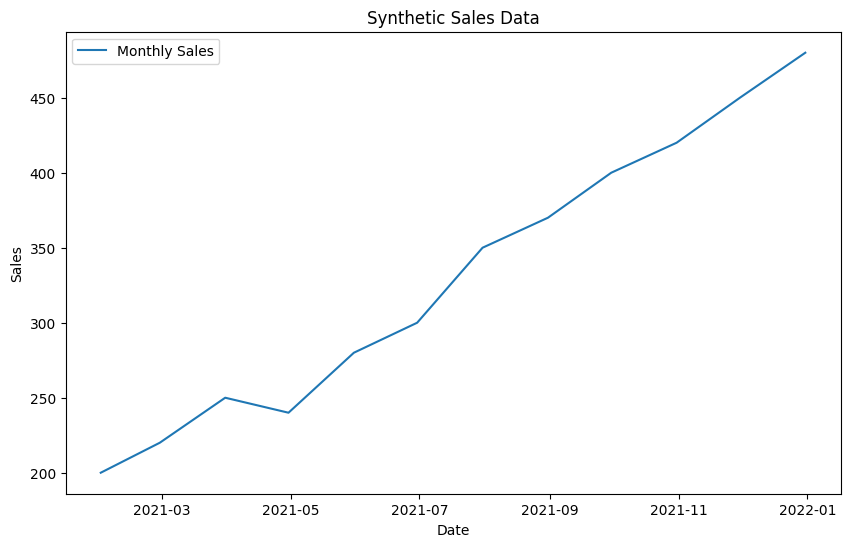

In [3]:
plt.figure(figsize=(10, 6))
plt.plot(df['Month'], df['Sales'], label="Monthly Sales")
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Synthetic Sales Data')
plt.legend()
plt.show()

Step 2: Data Preprocessing
 Normalize the data for LSTM model using MinMaxScaler

In [4]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df['Sales'].values.reshape(-1, 1))

 Convert the data into a format suitable for LSTM (X, Y)

In [5]:
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = 3  # We will use 3 previous months to predict the next month
X, y = create_dataset(scaled_data, time_step)


 Reshape X to be suitable for LSTM (samples, time steps, features)

In [6]:
X = X.reshape(X.shape[0], X.shape[1], 1)


 Split data into training and test sets# Split data into training and test set

In [7]:
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


Step 3: Define the LSTM model

In [8]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=False, input_shape=(X_train.shape[1], 1)))
model.add(Dense(units=1))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


 Compile the model

In [9]:

model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

Step 4: Train the model

In [10]:
history = model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=1)

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.3075
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2204 
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2093 
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1363 
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0555  
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0229 
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0126      
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0096 
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0157 
Epoch 10/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0115 
Epoch 11/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0059 
Epoch 12/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0079      
Epoch 13/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0176 
Epoch 14/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0108 
Epoch 15/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0148 
Epoch 16/

 Step 5: Model Evaluation
 Predict the sales for the test set

In [11]:
predictions = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step


Inverse the scaling to get actual sales predictions


In [12]:
predictions = scaler.inverse_transform(predictions)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))


Evaluate the model using Mean Squared Error (MSE)

In [13]:
mse = mean_squared_error(y_test_actual, predictions)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 215.6707946122632


Step 6: Plot the Results

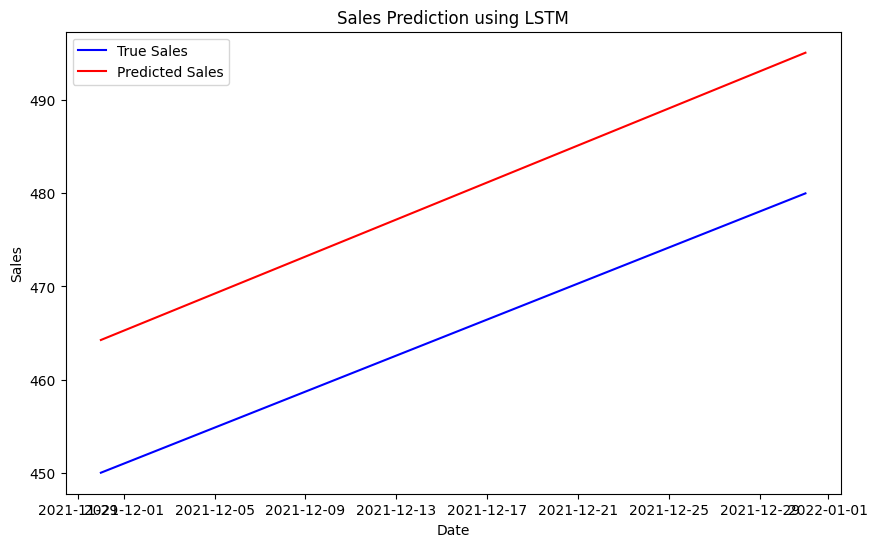

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(df['Month'][train_size+time_step:], y_test_actual, color='blue', label='True Sales')
plt.plot(df['Month'][train_size+time_step:], predictions, color='red', label='Predicted Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales Prediction using LSTM')
plt.legend()
plt.show()


Step 7: Predict the next month’s sales

In [15]:
last_data_point = scaled_data[-time_step:]  # Use the last 'time_step' months
last_data_point = last_data_point.reshape(1, time_step, 1)
predicted_sales = model.predict(last_data_point)
predicted_sales_actual = scaler.inverse_transform(predicted_sales)
print(f"Predicted sales for the next month: {predicted_sales_actual[0][0]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
Predicted sales for the next month: 524.5383911132812
